In [1]:
!pip install geopandas

In [11]:
!pip install pyshp

     -------------------------------------- 46.5/46.5 kB 333.0 kB/s eta 0:00:00


In [25]:
import geopandas as gpd
# Read shp data of Taiwan county 
# 縣市界
County_data = gpd.read_file("C:/Users/Huwalli/OneDrive/文件/GitHub/eduproject/mapdata202301070205/COUNTY_MOI_1090820.shp")
# Display data 顯示前5筆
County_data.head()


<AxesSubplot:>

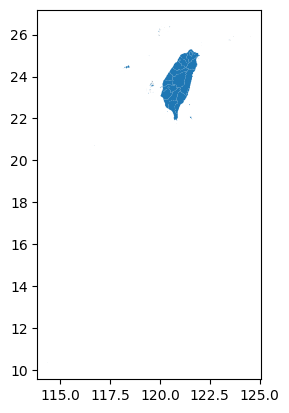

In [18]:
## plot data
Sample_data = County_data.loc[:, ['COUNTYNAME', 'geometry']]
Sample_data.plot()

<AxesSubplot:>

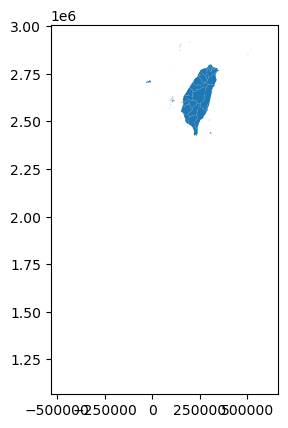

In [19]:
County_data=County_data.to_crs(epsg=3826)
Sample_data = County_data.loc[:, ['COUNTYNAME', 'geometry']]
Sample_data.plot()

<AxesSubplot:>

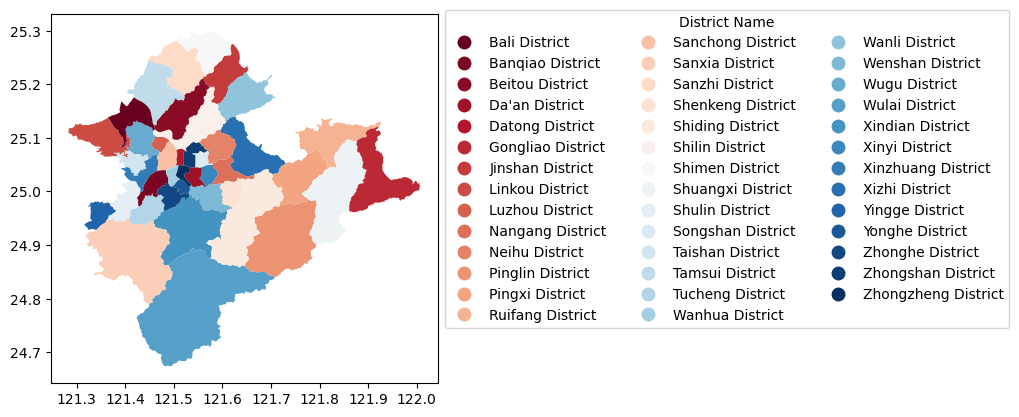

In [23]:
# 鄉鎮市區界
Town_data = gpd.read_file("C:/Users/Huwalli/OneDrive/文件/GitHub/eduproject/town/TOWN_MOI_1120825.shp")
Town_data.head()
Big_Taipei = Town_data[(Town_data['COUNTYNAME']=='臺北市') | (Town_data['COUNTYNAME']=='新北市')]
# add legend
leg_kwds={'title':'District Name',
          'loc': 'upper left',
          'bbox_to_anchor':(1, 1.03),
          'ncol':3}

Big_Taipei.plot(column='TOWNENG', cmap = 'RdBu', legend=True, legend_kwds=leg_kwds)

C:\Users\Huwalli\anaconda3\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


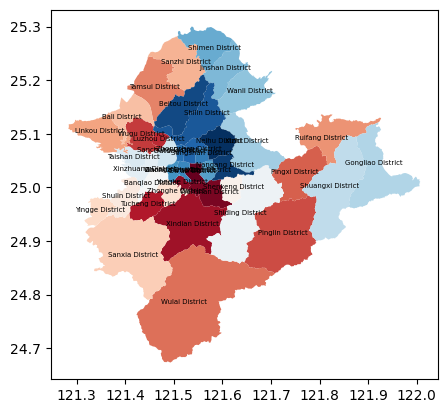

In [36]:
import matplotlib.pyplot as plt

# add town name label
Big_Taipei['coords'] = Big_Taipei['geometry'].apply(lambda x: x.representative_point().coords[:])
Big_Taipei['coords'] = [coords[0] for coords in Big_Taipei['coords']]

# 绘制图形
Big_Taipei.plot(cmap='RdBu')

# 遍历行，并在图形中添加标注
for idx, row in Big_Taipei.iterrows():
    plt.annotate(text=row['TOWNENG'], xy=row['coords'],
                 horizontalalignment='center', fontsize=5)

# 显示图形
plt.show()